In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BMW_Car_Sales_Classification.csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


#### No null values

In [4]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [5]:
df.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [6]:
df.Mileage_KM

0        151748
1        121671
2         10991
3         27255
4        122131
          ...  
49995    151030
49996    147396
49997    174939
49998      3379
49999    171003
Name: Mileage_KM, Length: 50000, dtype: int64

In [7]:
df.Model.unique()

array(['5 Series', 'i8', 'X3', '7 Series', 'M5', '3 Series', 'X1', 'M3',
       'X5', 'i3', 'X6'], dtype=object)

In [8]:
df['Model'].value_counts()

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64

In [9]:
df.Mileage_KM.min(),df.Mileage_KM.max()

(3, 199996)

In [10]:
df.rename(columns={'Mileage_KM':'Total_KM'},inplace=True)
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Total_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [11]:
for column in df.columns:
    if df[column].dtype=='object':
        print(df[column].value_counts())

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64
Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64
Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64
Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64
Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64
Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


In [12]:
df.Year.value_counts()

Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
2015    3358
2014    3350
2012    3332
2010    3330
2013    3326
2017    3290
2011    3278
2018    3278
2023    3219
2020    3205
Name: count, dtype: int64

#### EDA

In [13]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Total_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [55]:
sales_classification_by_region_model=df.groupby(['Region','Model','Sales_Classification'])['Sales_Classification'].agg(['count'])
sales_classification_by_region_model.sort_values(by='Sales_Classification')

count
Region        Model    Sales_Classification       
Africa        3 Series High                    244
North America X3       High                    263
Europe        X5       High                    242
              X3       High                    217
North America X5       High                    218
...                                            ...
Europe        7 Series Low                     532
              5 Series Low                     524
              3 Series Low                     515
Middle East   i8       Low                     513
South America i8       Low                     568

[132 rows x 1 columns]

In [69]:
df.groupby(['Fuel_Type','Sales_Classification'])['Sales_Classification'].agg(['count']).sort_values(by='Sales_Classification')

,,count
Fuel_Type,Sales_Classification,
Diesel,High,3758
Electric,High,3794
Hybrid,High,3879
Petrol,High,3815
Diesel,Low,8505
Electric,Low,8677
Hybrid,Low,8837
Petrol,Low,8735


In [70]:
sales_classification_low=df[df.Sales_Classification=='Low']
sales_classification_low

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Total_KM,Price_USD,Sales_Volume,Sales_Classification
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
...,...,...,...,...,...,...,...,...,...,...,...
49988,X5,2013,South America,Grey,Hybrid,Manual,3.9,177571,73736,2041,Low
49991,X5,2019,Asia,White,Diesel,Automatic,3.3,162639,33217,1904,Low
49993,5 Series,2013,Europe,Grey,Petrol,Manual,4.7,155013,80263,3700,Low
49994,5 Series,2010,North America,Silver,Petrol,Manual,3.6,56672,32990,1575,Low


In [71]:
sales_classification_high=df[df.Sales_Classification=='High']
sales_classification_high

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Total_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
11,i8,2016,North America,Blue,Hybrid,Manual,1.9,116863,74539,8252,High
12,7 Series,2020,North America,Silver,Diesel,Automatic,3.8,27403,100015,8111,High
...,...,...,...,...,...,...,...,...,...,...,...
49992,i3,2017,Middle East,Blue,Petrol,Automatic,3.9,79874,115046,9015,High
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High


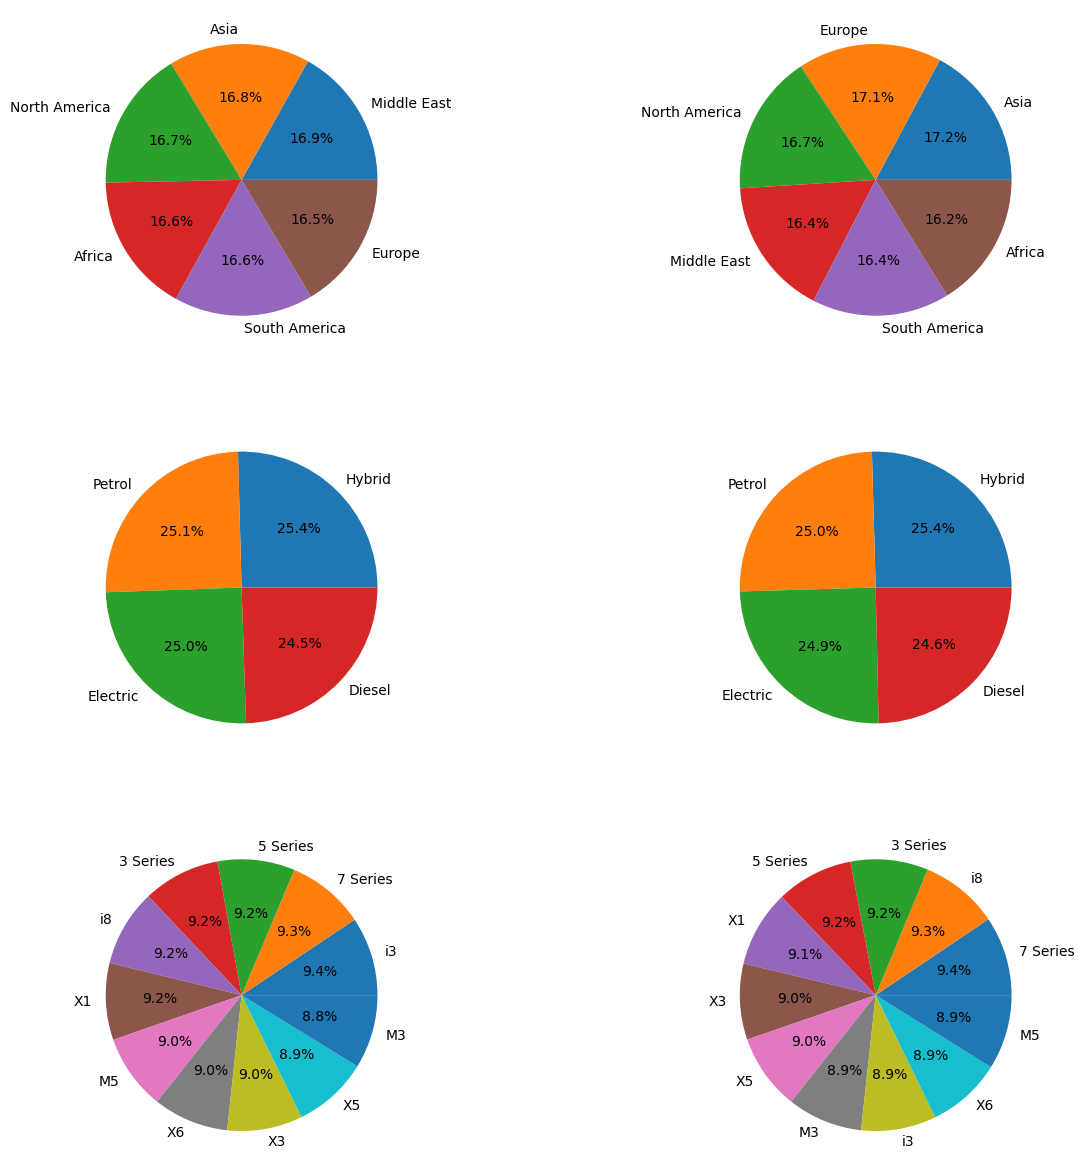

In [110]:
fig=plt.figure(figsize=(20,25))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)



sales_classification_low.Region.value_counts().plot.pie(autopct='%1.1f%%',ylabel='',ax=ax1,figsize=(15,15))
sales_classification_high.Region.value_counts().plot.pie(autopct='%1.1f%%',ylabel='',ax=ax2,figsize=(15,15))


sales_classification_low.Fuel_Type.value_counts().plot.pie(autopct='%1.1f%%',ylabel='',ax=ax3,figsize=(15,15))
sales_classification_high.Fuel_Type.value_counts().plot.pie(autopct='%1.1f%%',ylabel='',ax=ax4,figsize=(15,15))

sales_classification_low.Model.value_counts().plot.pie(autopct='%1.1f%%',ylabel='',ax=ax5,figsize=(15,15))
sales_classification_high.Model.value_counts().plot.pie(autopct='%1.1f%%',ylabel='',ax=ax6,figsize=(15,15))


plt.show()

In [124]:
sales_classification_low.groupby(['Year','Model'])['Price_USD'].agg(['mean']).sort_values(by='mean',ascending=False)

,,mean
Year,Model,
2014,7 Series,79928.302752
2016,7 Series,79091.368421
2023,M3,78378.207729
2015,i3,78297.957447
2021,X1,78271.112245
...,...,...
2020,X5,71680.842391
2010,M5,71655.037559
2020,7 Series,71625.669767


In [122]:
sales_classification_high.groupby(['Year','Model'])['Price_USD'].agg(['mean']).sort_values(by='mean',ascending=False)

,,mean
Year,Model,
2014,X1,81511.010638
2020,3 Series,81011.270833
2023,5 Series,80872.142857
2018,X5,80807.680851
2023,i8,80633.483516
...,...,...
2021,5 Series,69687.098592
2015,i8,69660.660194
2010,X6,67699.579545


### Top 30 cars by Price

In [17]:
top_30_by_price=df.sort_values(by='Price_USD',ascending=False)[:30]
top_30_by_price

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Total_KM,Price_USD,Sales_Volume,Sales_Classification
26071,i8,2010,Middle East,Silver,Electric,Manual,4.2,115320,119998,5842,Low
38158,X6,2019,Asia,Red,Electric,Automatic,3.3,142419,119997,4575,Low
6862,i8,2024,Africa,Silver,Diesel,Automatic,4.1,163849,119997,9250,High
154,X1,2016,Africa,Grey,Petrol,Manual,4.1,172950,119996,9620,High
6271,3 Series,2019,Middle East,White,Hybrid,Manual,4.0,12264,119994,3259,Low
35981,i8,2016,North America,Red,Hybrid,Manual,4.6,26622,119992,8065,High
35591,5 Series,2023,Asia,Silver,Hybrid,Automatic,2.5,181043,119988,4090,Low
43317,X1,2014,Africa,Black,Diesel,Automatic,4.1,146281,119988,9502,High
31658,X6,2016,Africa,White,Electric,Automatic,3.8,27540,119988,3147,Low
38800,X6,2017,South America,White,Diesel,Manual,2.2,95648,119986,2285,Low


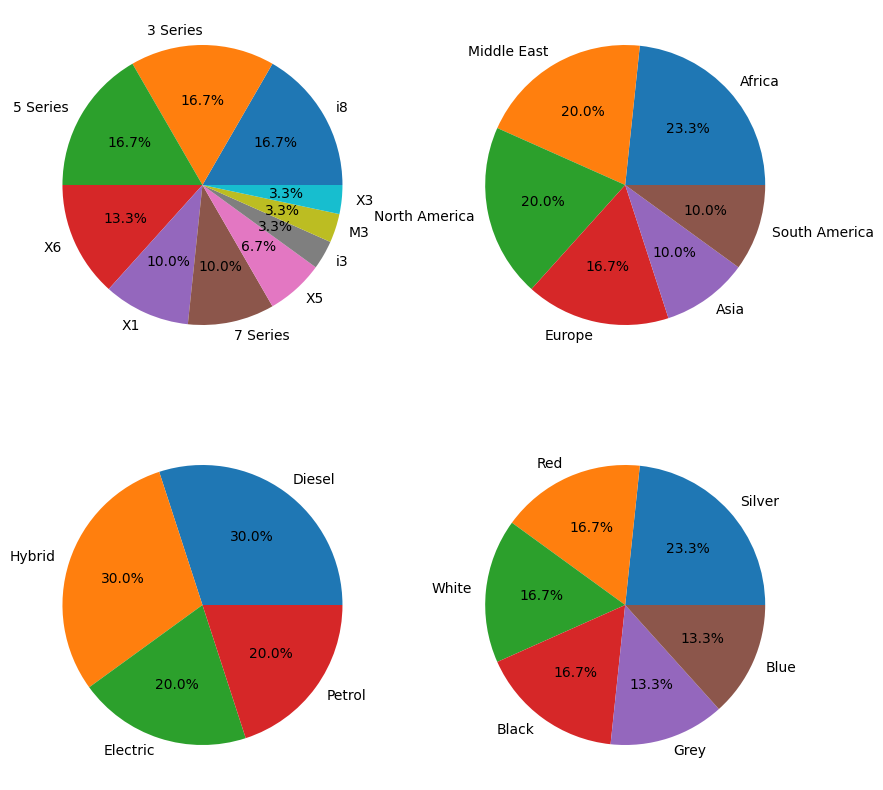

In [ ]:
fig=plt.figure(figsize=(12,7))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
top_30_by_price.Model.value_counts().plot.pie(ax=ax1,ylabel='',autopct='%1.1f%%',figsize=(10,10))
top_30_by_price.Region.value_counts().plot.pie(ax=ax2,ylabel='',autopct='%1.1f%%')
top_30_by_price.Fuel_Type.value_counts().plot.pie(ax=ax3,label='',autopct='%1.1f%%')
top_30_by_price.Color.value_counts().plot.pie(ax=ax4,ylabel='',autopct='%1.1f%%')
plt.show()

<Axes: ylabel='Frequency'>

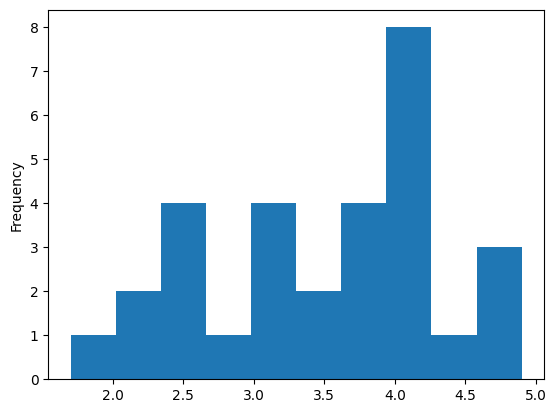

In [46]:
top_30_by_price.Engine_Size_L.plot.hist()